In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df_final = pd.read_csv('df_final.csv')

In [22]:
df = df_final.drop('commande',axis=1)

In [23]:
df.shape

(5270, 72)

In [24]:
df.describe()

,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,blette,breuil,carotte,...,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre,yaourt
count,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,...,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000
mean,0.310247,0.051044,0.020683,0.035674,0.000380,0.049905,0.360152,0.066414,0.096584,0.092979,...,0.038330,0.012144,0.026186,0.107780,0.010816,0.272296,0.196964,0.042884,0.061101,1.060721
std,0.747457,0.220108,0.142335,0.185493,0.019479,0.217770,0.536472,0.249027,0.295419,0.290431,...,0.209952,0.109540,0.188080,0.310132,0.103446,0.583225,0.616646,0.260774,0.285117,1.246028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,5.000000,1.000000,1.000000,5.000000,6.000000,4.000000,4.000000,7.000000


## Essai Kmeans

In [26]:
# Standardisation
from sklearn import preprocessing
df_standardized = preprocessing.scale(df)
df_standardized = pd.DataFrame(df_standardized)

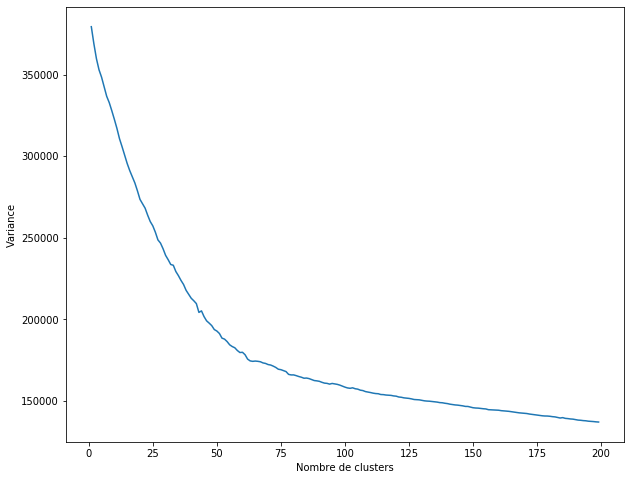

In [29]:
# On essaie de trouver le nombre de cluster approprié
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
variance = []
for i in range(1, 200):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_standardized)
    variance.append(kmeans.inertia_)
plt.plot(range(1, 200), variance)
plt.xlabel('Nombre de clusters')
plt.ylabel('Variance')
plt.show()

In [30]:
# Graphiquement on constate qu'autour de 50 clusters la courbe à tendance à s'aplatir

In [31]:
# On découpe notre df en 50 classes
kmeans = KMeans(n_clusters=50)
kmeans.fit(df_standardized)
classes = kmeans.predict(df_standardized)

In [38]:
# On ajoute la colonne classe au dataframe avec les résultats obtenus
df_final['classe'] = classes

In [40]:
# Pour la lisibilité on met la colonne 'classe' au début de dataframe
cols = df_final.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_final = df_final[cols]
df_final

,classe,commande,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,blette,...,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre,yaourt
0,12,1743,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,22,1750,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14,1751,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1752,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
4,29,1753,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,8,7201,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5266,2,7202,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5267,8,7203,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5268,19,7204,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,2
